# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tmitrevski/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
print(api_key)

f9dbc7e232a44cf39ee2268b5d2f259d


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Define the get_crypto_news function
def get_crypto_news(crypto_ticker, input_language):
    crisis_news_en = newsapi.get_everything(
        q = crypto_ticker,
        language = input_language
    )
    #Print the total number of news
    print(crisis_news_en["totalResults"])
    return crisis_news_en

In [6]:
# Create_df function
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Fetch the Bitcoin news articles
btc_news = get_crypto_news("btc", "en")
btc_news_df = create_df(btc_news["articles"], "en")

2140


In [8]:
btc_news_df.head()

,title,description,text,date,language
0,Miami's Bitcoin Conference May Be the Latest C...,"Several crypto fans that descended on Miami, F...","Several crypto fans that descended on Miami, F...",2021-06-11,en
1,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...","It's all about clean energy, it seems. \r\nElo...",2021-06-14,en
2,Musk says Tesla will accept bitcoins when mine...,Tesla Inc's Elon Musk tweeted on Sunday that t...,By Reuters Staff\r\nJune 13 (Reuters) - Tesla ...,2021-06-13,en
3,What to Know Before Investing in Crypto,The crypto market is in the midst of a bear ma...,Opinions expressed by Entrepreneur contributor...,2021-07-08,en
4,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,El Salvador has become the first country in th...,2021-06-09,en


In [9]:
# Fetch the Ethereum news articles
eth_news = get_crypto_news("eth", "en")
eth_news_df = create_df(eth_news["articles"], "en")

984


In [10]:
eth_news_df.head()

,title,description,text,date,language
0,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...","It's all about clean energy, it seems. \r\nElo...",2021-06-14,en
1,SEC Commissioner Hester Pierce worries that st...,Summary List PlacementEfforts by US officials ...,SEC Commissioner Hester Peirce.\r\nChris Madda...,2021-06-09,en
2,Ethereum creator Vitalik Buterin made more tha...,Ethereum billionaire founder Vitalik Buterin b...,This article was translated from our Spanish e...,2021-06-10,en
3,Inventor of the World Wide Web is auctioning i...,"Sir Tim Berners-Lee, credited as the inventor ...","Sir Tim Berners-Lee, credited as the inventor ...",2021-06-15,en
4,ENS,ENS stands for Ethereum Name Service and it is...,ENS stands for Ethereum Name Service and it is...,2021-06-16,en


In [11]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [12]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [13]:
# Get sentiment for the text and the title
def return_sentiments(crypto):
    for index, row in crypto.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
    # Attaching sentiment columns to the News DataFrame
    returnable_df = pd.DataFrame({
        "title_compound": pd.Series(title_sent["title_compound"]).describe(),
        'text_compound': pd.Series(text_sent["text_compound"]).describe(),
        "title_pos": pd.Series(title_sent["title_pos"]).describe(),
        'text_pos': pd.Series(text_sent["text_pos"]).describe(),
        "title_neu": pd.Series(title_sent["title_neu"]).describe(),
        'text_neu': pd.Series(text_sent["text_neu"]).describe(),
        "title_neg": pd.Series(title_sent["title_neg"]).describe(),
        'text_neg': pd.Series(text_sent["text_neg"]).describe(),
        "title_sent": pd.Series(title_sent["title_sent"]).describe(),
        'text_sent': pd.Series(text_sent["text_sent"]).describe()
        
    })
    return returnable_df

In [14]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = return_sentiments(btc_news_df)

In [15]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = return_sentiments(eth_news_df)

In [16]:
# Describe the Bitcoin Sentiment
btc_sentiment

,title_compound,text_compound,title_pos,text_pos,title_neu,text_neu,title_neg,text_neg,title_sent,text_sent
count,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.017195,0.034670,0.06280,0.05735,0.888250,0.894800,0.048950,0.047850,0.000000,0.200000
std,0.369501,0.427437,0.11641,0.05484,0.120512,0.055099,0.086276,0.056042,0.794719,0.894427
min,-0.735100,-0.718400,0.00000,0.00000,0.575000,0.826000,0.000000,0.000000,-1.000000,-1.000000
25%,-0.220025,-0.307000,0.00000,0.00000,0.841500,0.853750,0.000000,0.000000,-1.000000,-1.000000
50%,0.000000,0.064250,0.00000,0.05500,0.899000,0.872500,0.000000,0.030500,0.000000,0.500000
75%,0.128000,0.312300,0.11825,0.08275,1.000000,0.936000,0.075250,0.073500,1.000000,1.000000
max,0.750600,0.690800,0.42500,0.16900,1.000000,1.000000,0.256000,0.162000,1.000000,1.000000


In [17]:
# Describe the Ethereum Sentiment
eth_sentiment

,title_compound,text_compound,title_pos,text_pos,title_neu,text_neu,title_neg,text_neg,title_sent,text_sent
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,0.042085,0.086755,0.075725,0.054300,0.893400,0.912575,0.030875,0.033125,0.150000,0.35000
std,0.330784,0.347396,0.124326,0.050359,0.127354,0.059307,0.074551,0.047888,0.699817,0.80224
min,-0.735100,-0.718400,0.000000,0.000000,0.575000,0.819000,0.000000,0.000000,-1.000000,-1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.824750,0.863250,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.102700,0.000000,0.059000,0.965000,0.917500,0.000000,0.000000,0.000000,1.00000
75%,0.284450,0.278900,0.141000,0.080000,1.000000,0.954250,0.000000,0.064000,1.000000,1.00000
max,0.750600,0.690800,0.425000,0.169000,1.000000,1.000000,0.256000,0.162000,1.000000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin's text had a higher mean positive score by .000003; Ethereum's title had a higher mean positive score by .00021;

Q: Which coin had the highest compound score?

A: The max compound scores were the same for both coins.

Q. Which coin had the highest positive score?

A: The max positive scores were the same for both coins.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [69]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw.update(['char', 'ha', 'wa', 'may'])
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tmitrevski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'char',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'may',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'ou

In [70]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [71]:
btc_news_df_copy = btc_news_df.copy()
btc_news_df_copy["tokens"] = ""

In [72]:
# Create a new tokens column for Bitcoin
for index, row in btc_news_df_copy.iterrows():
    btc_news_df_copy['tokens'][index] = tokenizer(btc_news_df_copy['text'][index])

In [96]:
btc_news_df_copy.text[0]

'Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. \r\nLarry Cermak, research director … [+2389 chars]'

In [74]:
# Create a new tokens column for Ethereum
eth_news_df_copy = eth_news_df.copy()
eth_news_df_copy["tokens"] = ""
for index, row in eth_news_df_copy.iterrows():
    eth_news_df_copy['tokens'][index] = tokenizer(eth_news_df_copy['text'][index])
eth_news_df_copy.head()

,title,description,text,date,language,tokens
0,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...","It's all about clean energy, it seems. \r\nElo...",2021-06-14,en,"[clean, energy, seemselon, musk, tesla, caused..."
1,SEC Commissioner Hester Pierce worries that st...,Summary List PlacementEfforts by US officials ...,SEC Commissioner Hester Peirce.\r\nChris Madda...,2021-06-09,en,"[sec, commissioner, hester, peircechris, madda..."
2,Ethereum creator Vitalik Buterin made more tha...,Ethereum billionaire founder Vitalik Buterin b...,This article was translated from our Spanish e...,2021-06-10,en,"[article, translated, spanish, edition, using,..."
3,Inventor of the World Wide Web is auctioning i...,"Sir Tim Berners-Lee, credited as the inventor ...","Sir Tim Berners-Lee, credited as the inventor ...",2021-06-15,en,"[sir, tim, bernerslee, credited, inventor, wor..."
4,ENS,ENS stands for Ethereum Name Service and it is...,ENS stands for Ethereum Name Service and it is...,2021-06-16,en,"[ens, stand, ethereum, name, service, decentra..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [75]:
from collections import Counter
from nltk import ngrams

In [76]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = []
for index, row in btc_news_df_copy.iterrows():
    for token in row['tokens']:
        btc_tokens.append(token)
btc_bigrams = ngrams(btc_tokens, n=2)
top_10_btc = dict(Counter(btc_bigrams).most_common(10))
btc_bigram_df = pd.DataFrame(list(top_10_btc.items()), columns=['bigram', 'count'])

In [77]:
btc_bigram_df

,bigram,count
0,"(elon, musk)",3
1,"(el, salvador)",3
2,"(article, translated)",3
3,"(translated, spanish)",3
4,"(spanish, edition)",3
5,"(edition, using)",3
6,"(using, ai)",3
7,"(ai, technology)",3
8,"(technology, errors)",3
9,"(errors, exist)",3


In [78]:
# Generate the Ethereum N-grams where N=2
eth_tokens = []
for index, row in eth_news_df_copy.iterrows():
    for token in row['tokens']:
        eth_tokens.append(token)
eth_bigrams = ngrams(eth_tokens, n=2)
top_10_eth = dict(Counter(eth_bigrams).most_common(10))
eth_bigram_df = pd.DataFrame(list(top_10_eth.items()), columns=['bigram', 'count'])

In [79]:
eth_bigram_df

,bigram,count
0,"(eth, zurich)",3
1,"(cryptocurrency, market)",2
2,"(wheels, stable)",2
3,"(stable, mean)",2
4,"(mean, roam)",2
5,"(roam, around)",2
6,"(around, challenging)",2
7,"(challenging, terrain)",2
8,"(terrain, mars)",2
9,"(mars, limit)",2


In [80]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [81]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('bitcoin', 11),
 ('tesla', 5),
 ('market', 5),
 ('musk', 4),
 ('cryptocurrency', 4),
 ('investor', 4),
 ('using', 4),
 ('thursday', 4),
 ('us', 4),
 ('inflation', 4)]

In [82]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('eth', 6),
 ('nft', 5),
 ('brooklyn', 5),
 ('cryptocurrency', 4),
 ('robot', 4),
 ('bitcoin', 4),
 ('new', 4),
 ('tesla', 3),
 ('first', 3),
 ('ethereum', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

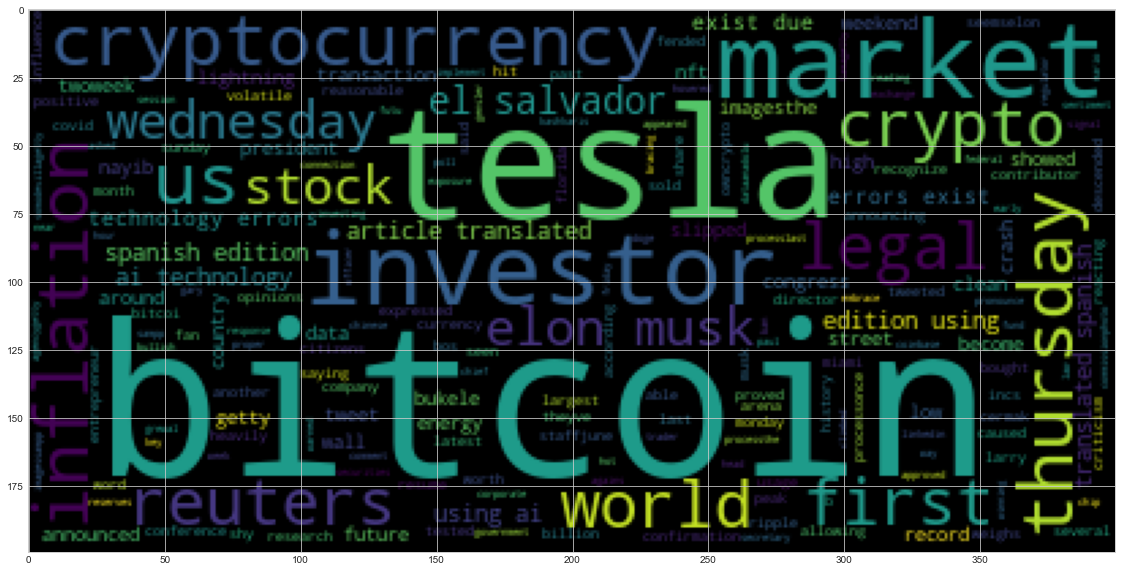

In [85]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(btc_wc)

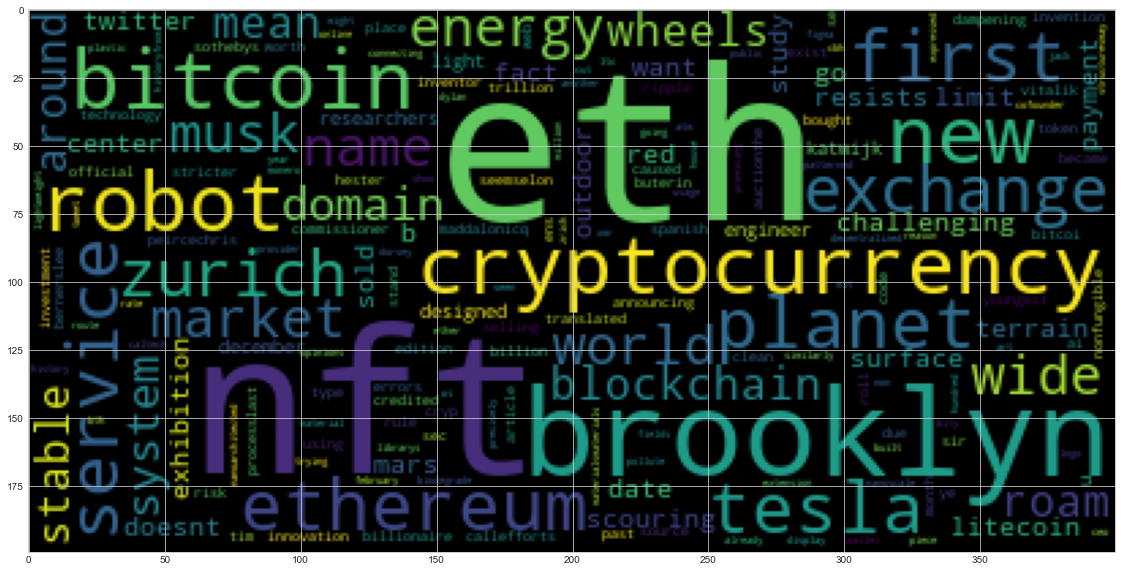

In [86]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [87]:
import spacy
from spacy import displacy

In [88]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [89]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [94]:
# Concatenate all of the Bitcoin text together
btc_text = ''
regex = re.compile("[^a-zA-Z ]")
for index, row in btc_news_df_copy.iterrows():
    clean_text = regex.sub(' ', row['text'])
    btc_text = btc_text + ' ' + clean_text

In [95]:
print(btc_text)

 Several crypto fans that descended on Miami  Florida  last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid       Larry Cermak  research director          chars  It s all about clean energy  it seems    Elon Musk and Tesla caused ripples in the cryptocurrency market in the past few months  first by announcing that Tesla had bought      billion worth of bitcoi         chars  By Reuters Staff  June     Reuters    Tesla Incs Elon Musk tweeted on Sunday that the company will resume allowing bitcoin transactions when there is confirmation of reasonable clean energy usage by         chars  Opinions expressed by Entrepreneur contributors are their own   Crypto is a volatile market that has seen its share of crashes  but the latest Bitcoin crash showed that not all crypto investors are r         chars  El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency  according to President Nayi

In [99]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

In [100]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [103]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Miami',
 'Florida',
 'Larry Cermak',
 'Elon Musk',
 'Tesla',
 'the past few months',
 'first',
 'Tesla',
 'Reuters',
 'June',
 'Reuters',
 'Tesla',
 'Incs Elon Musk',
 'Sunday',
 'Crypto',
 'Bitcoin',
 'El Salvador',
 'first',
 'Nayib Bukele',
 'Wednesday',
 'Citizens',
 'Spanish',
 'AI',
 'Elon Musk',
 'Bitcoin',
 'two week',
 'Monday',
 'another weekend',
 'Tesla',
 'Elon Musk',
 'Tesla',
 'Spanish',
 'AI',
 'Last week',
 'Chinese',
 'Spanish',
 'AI',
 'The Congress of El Salvador',
 'the early hours',
 'Wednesday',
 'Kashkari',
 'Paul Grewal',
 'Coinbase',
 'Mario Tama Getty',
 'Thursday',
 'US',
 'the Federal Reserve',
 'Gary Gensler',
 'the Securities and Exchange Commission',
 'Chip Somodevilla Getty',
 'US',
 'Thursday',
 'Anadolu Agency',
 'Getty Images',
 'Friday',
 'US',
 'Thursday',
 'AFP',
 'Getty Images',
 'Tech',
 'Thursday',
 'SEC',
 'Hester Peirce',
 'Chris Maddaloni CQ Roll',
 'US',
 'Se         ',
 'the Lightning Network',
 'Earlier this year',
 'Lightning Ne',
 'Co

---

### Ethereum NER

In [104]:
# Concatenate all of the Ethereum text together
eth_text = ''
regex = re.compile("[^a-zA-Z ]")
for index, row in eth_news_df_copy.iterrows():
    clean_text = regex.sub(' ', row['text'])
    eth_text = eth_text + ' ' + clean_text

In [105]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

In [106]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [108]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['Elon Musk',
 'Tesla',
 'the past few months',
 'first',
 'Tesla',
 'SEC',
 'Hester Peirce',
 'Chris Maddaloni CQ Roll',
 'US',
 'Se         ',
 'Spanish',
 'AI',
 'Last May',
 'VitaliK Buterin',
 'ye         ',
 'Tim Berners Lee',
 'the World Wide',
 'NFT',
 'Sotheby s',
 'NFT',
 'ENS',
 'Ethereum Name Service',
 'Ethereum',
 'Wheels',
 'Mars',
 'the Red Planet',
 'Wheels',
 'Mars',
 'the Red Planet',
 'hundreds of years',
 'February',
 'Dylan Fields',
 'NFT',
 'million',
 'Jack Dorsey',
 'first',
 'Twitter',
 'Bitcoin',
 'BTH',
 'Litecoin',
 'Monero',
 'Bity',
 'the House of         ',
 'Brooklyn',
 'the Center for Brooklyn History',
 'CBH',
 'MIT',
 'Caltech',
 'ETH Z',
 'May',
 'Elon Musk',
 'Tesla',
 'Bitcoin',
 'ETH Zurich',
 'night',
 'ETH Zurich',
 'decades',
 'first',
 'Reuben Wu',
 'Lux Noctis',
 'Titled  ',
 'ETH Zurich',
 'two',
 'NCR Corp',
 'weekly',
 'NEW DELHI',
 'Indian',
 'one',
 'KATWIJK',
 'NETHERLANDS',
 'Litecoin',
 'Bitcoin',
 'December',
 'Katwijk']

---